In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('economic_index.csv')
df.info()

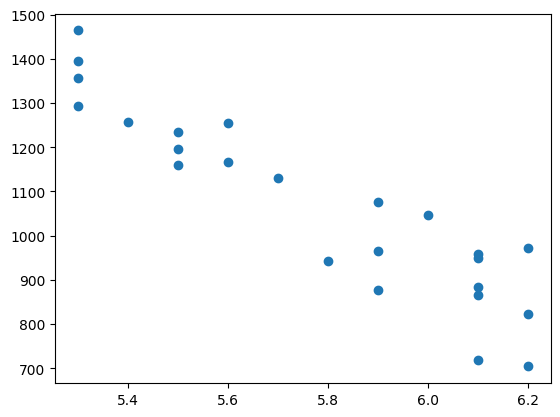

In [9]:
plt.scatter(df['unemployment_rate'],df['index_price'])

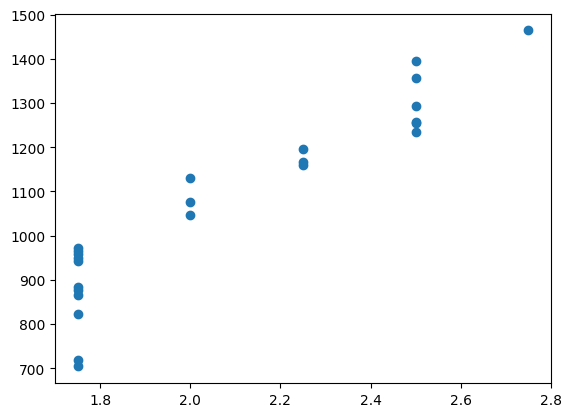

In [8]:
plt.scatter(df['interest_rate'],df['index_price'])

In [10]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


In [11]:
#we can see clearly that unemployement and index price are negatively correlated 
#interest rate and index price are positively correlated

#let's drop the unrelated columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [12]:
# X = df[['interest_rate','unemployement_rate']]
# y = df['index_price']
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

<Axes: xlabel='interest_rate', ylabel='index_price'>

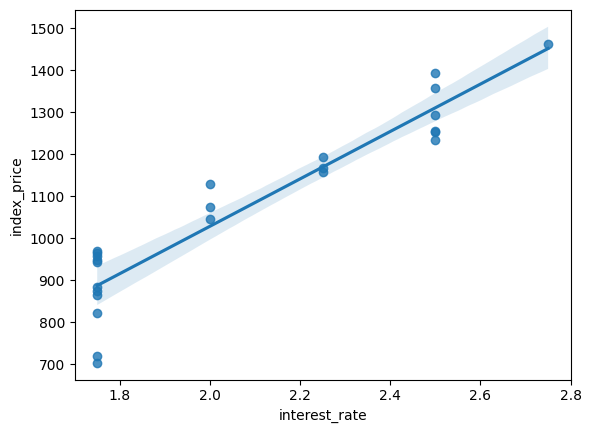

In [16]:
#gives us an idea
sns.regplot(x='interest_rate',y='index_price',data = df)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,y_train)

In [20]:
# cross validation of training data
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(cross_score)

-6068.247717046758

In [21]:
y_pred = regression.predict(X_test)

In [22]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

2288.0783532823357 41.991289651586044 47.83386199422262


In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.8859818437644801


ValueError: x and y must be the same size

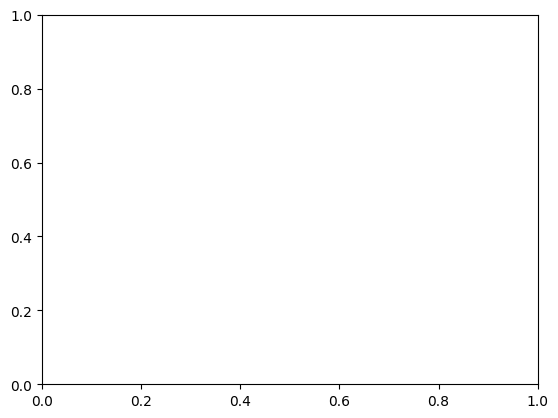

In [29]:
# plotting for test data
# THIS IS NOT POSSIBLE U DUMB FUCK ... THERE ARE MORE FEATURES
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred)

In [30]:
residuals = y_test-y_pred
print(residuals)

13    35.584243
18    13.782371
3    -54.368175
14   -16.014821
20   -53.415757
17    78.782371
Name: index_price, dtype: float64


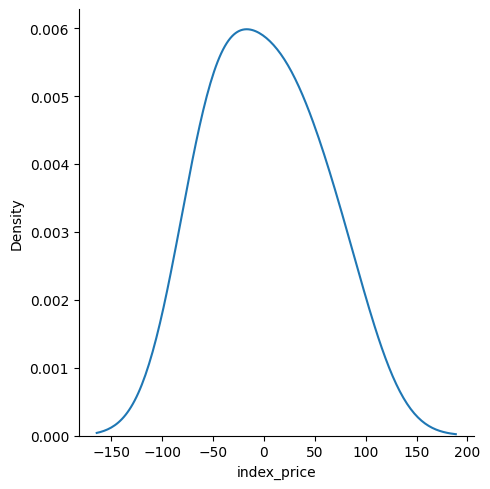

In [31]:
sns.displot(residuals,kind='kde')

<Axes: xlabel='index_price'>

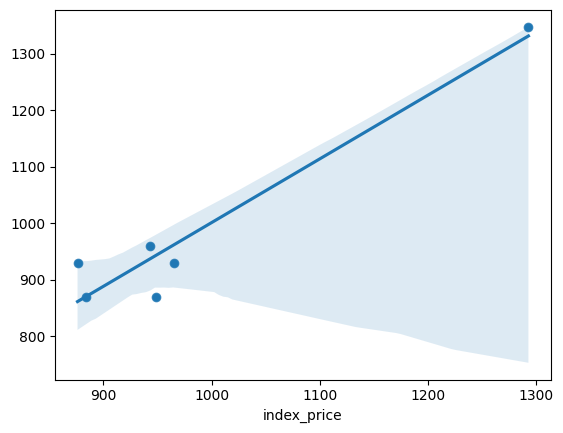

In [34]:
# scatterplot w.r.t predicted and test 
sns.scatterplot(x=y_test,y=y_pred)
sns.regplot(x=y_test,y=y_pred)

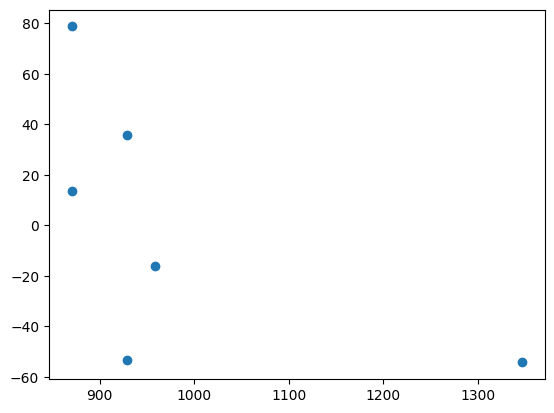

In [35]:
plt.scatter(y_pred,residuals)

In [38]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.2754
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                       0.763
Time:                        08:50:32   Log-Likelihood:                         -151.61
No. Observations:                  18   AIC:                                      307.2
Df Residuals:                      16   BIC:                                      309.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Saqlain\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
regression.coef_

array([107.5650807 , -99.27827864])